# readme
descrip: plot EOF analysis for Altimeter SSH for North Atlantic

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
lat1, lat2 = 20, 65
lon1, lon2 = -90+360, 360 # 90W
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/SSH/'

In [3]:
infile1_TH = indir + 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100.regrid_2021Apr05.nc'

ds_TH = xr.open_dataset(infile1_TH)
ssh_TH_yr = ds_TH.SSH.sel(lat=slice(lat1, lat2),lon=slice(lon1, lon2)) # unit: cm
ssh_TH_yr

<xarray.DataArray 'SSH' (time: 251, lat: 450, lon: 900)>
[101655000 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00:00...
  * lat      (lat) float32 20.05 20.15 20.25 20.35 ... 64.65 64.75 64.85 64.95
  * lon      (lon) float32 270.0 270.1 270.2 270.3 ... 359.6 359.7 359.8 359.9
Attributes:
    spatial_op:    Bilinear remapping: 1st order: fracarea: NCL: ./map_tx0.1v...
    cell_methods:  time: mean
    grid_loc:      2110
    coordinates:   TLONG TLAT 
    units:         centimeter
    long_name:     Sea Surface Height

In [4]:
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/SSH/'
infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100.regrid_2021Apr05.nc'
# lat1, lat2 = 20, 65
# lon1, lon2 = -90+360, 360 # 90W
ds_TL = xr.open_dataset(infile1_TL)
ssh_TL_yr = ds_TL.SSH.sel(lat=slice(lat1, lat2),lon=slice(lon1, lon2)) # unit: cm
ssh_TL_yr

<xarray.DataArray 'SSH' (time: 251, lat: 45, lon: 90)>
[1016550 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    spatial_op:    Bilinear remapping: 1st order: destarea: NCL: ./map_gx1v6_...
    cell_methods:  time: mean
    grid_loc:      2110
    coordinates:   TLONG TLAT 
    units:         centimeter
    long_name:     Sea Surface Height

In [5]:
ssh_df_TH = (ssh_TH_yr.sel(time=slice('2091','2100')).mean('time') - 
             ssh_TH_yr.sel(time=slice('1991','2000')).mean('time'))
ssh_df_TL = (ssh_TL_yr.sel(time=slice('2091','2100')).mean('time') - 
             ssh_TL_yr.sel(time=slice('1991','2000')).mean('time'))
# ssh_df_TH

In [6]:
ssh1_TH = ssh_TH_yr.sel(time=slice('1991','2000')).mean('time')
ssh2_TH = ssh_TH_yr.sel(time=slice('2091','2100')).mean('time') 


ssh1_TL = ssh_TL_yr.sel(time=slice('1991','2000')).mean('time')
ssh2_TL = ssh_TL_yr.sel(time=slice('2091','2100')).mean('time')

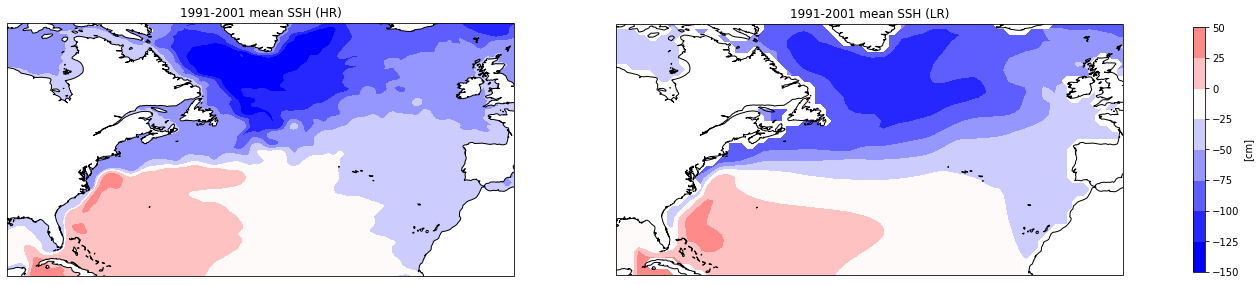

In [7]:
fig = plt.figure(figsize=(25, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(121,projection=pc)
ax1.coastlines()
subplt1=ax1.contourf(ssh1_TH.lon, ssh1_TH.lat, ssh1_TH, vmin=-130, vmax=100,
               transform=pc,cmap='bwr')
ax1.set_title('1991-2001 mean SSH (HR)')

ax2 = plt.subplot(122,projection=pc)
ax2.coastlines()
subplt2=ax2.contourf(ssh1_TL.lon, ssh1_TL.lat, ssh1_TL, vmin=-130, vmax=100,
               transform=pc,cmap='bwr')
ax2.set_title('1991-2001 mean SSH (LR)')

# # Now adding the colorbar
cb = fig.colorbar(subplt1, ax=[ax1,ax2], shrink=0.75)
cb.set_label('[cm]')

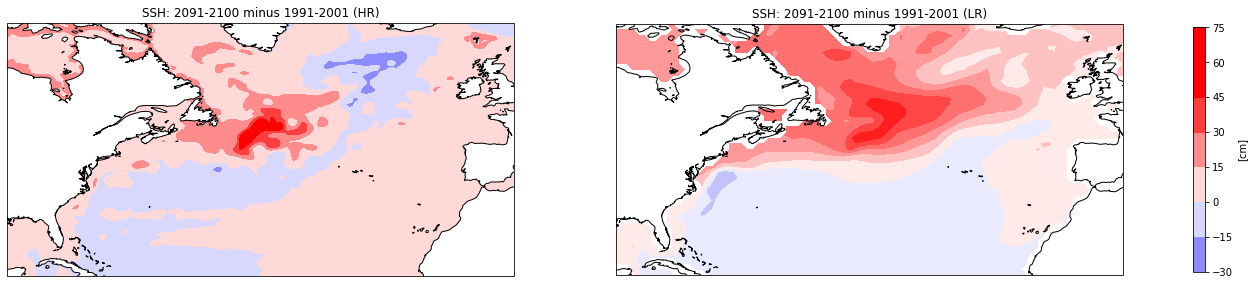

In [8]:
fig = plt.figure(figsize=(25, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(121,projection=pc)
ax1.coastlines()
subplt1=ax1.contourf(ssh1_TH.lon, ssh1_TH.lat, ssh_df_TH, vmin=-50, vmax=50,
               transform=pc,cmap='bwr')
ax1.set_title('SSH: 2091-2100 minus 1991-2001 (HR)')

ax2 = plt.subplot(122,projection=pc)
ax2.coastlines()
subplt2=ax2.contourf(ssh1_TL.lon, ssh1_TL.lat, ssh_df_TL, vmin=-50, vmax=50,
               transform=pc,cmap='bwr')
ax2.set_title('SSH: 2091-2100 minus 1991-2001 (LR)')

# # Now adding the colorbar
cb = fig.colorbar(subplt1, ax=[ax1,ax2], shrink=0.75)
cb.set_label('[cm]')

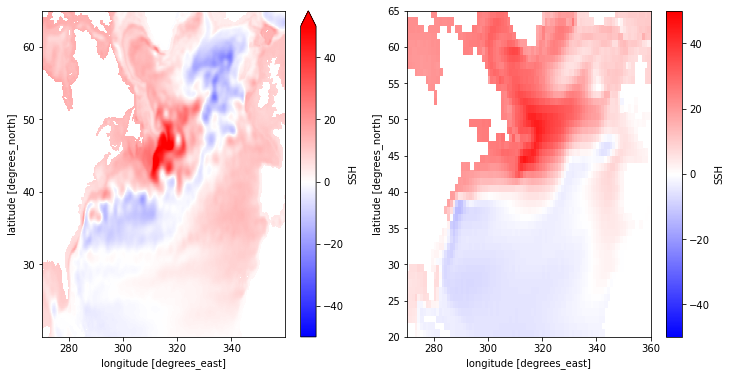

In [28]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
ssh_df_TH.plot(ax=axes[0],vmin=-50, vmax=50, cmap='bwr')
ssh_df_TL.plot(ax=axes[1],vmin=-50, vmax=50, cmap='bwr')

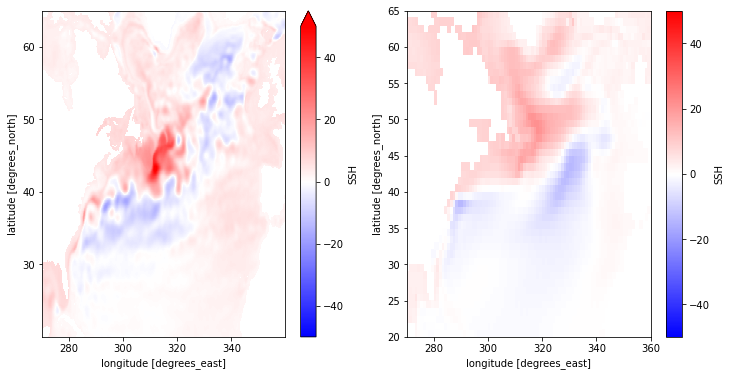

In [21]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
(ssh51_TH-ssh01_TH).plot(ax=axes[0],vmin=-50, vmax=50, cmap='bwr')
(ssh51_TL-ssh01_TL).plot(ax=axes[1],vmin=-50, vmax=50, cmap='bwr')